# Модуль 1
-------------------

In [26]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Алгоритмы кластеризации
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture


%matplotlib inline

### 1.1 Парсинг данных

In [27]:
df_tr1 = pd.read_csv('data/3 вар/Data/train_2.csv', delimiter=';', low_memory=False)
#df_tr1.iloc[0:10, 0:5]
df_tr1.head()

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0


In [28]:
df_tr2 = pd.read_csv('data/3 вар/Data/train_1.csv', delimiter=';', low_memory=False)
df_tr2

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...
...,...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021 8:10:34,5411,1202,NaN
12845071,500000000002290038,1,09.08.2021,5411,955,NaN
12845072,500000000005033472,2,05.10.2021 14:42:52,5311,"1198,1",NaN
12845073,500000000054330593,1,25.09.2021 21:21:02,5411,"435,74",NaN


In [29]:
df=df_tr1.merge(df_tr2, on=['ID'])

In [30]:
df.head()

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,31.10.2021 11:30:06,5462,106,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,22.10.2021 10:46:13,5921,"226,96",KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,05.09.2021 10:02:10,4121,102,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,13.10.2021 21:24:47,5691,21642,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,500000000000003702,5,5,35,2,3,3,0,87000,9.0,2,27.10.2021 19:47:16,5399,4026,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12845075 entries, 0 to 12845074
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ID               int64  
 1   MM_IN_BANK       int64  
 2   MM_W_CARD        int64  
 3   AGE              int64  
 4   GENDER           int64  
 5   EDUCATION_LEVEL  int64  
 6   MARITAL_STATUS   int64  
 7   DEPENDANT_CNT    int64  
 8   INCOME_MAIN_AMT  float64
 9   REG_CODE         float64
 10  PROD_TYPE        int64  
 11  TRANS_DTTM       object 
 12  MCC_CODE         int64  
 13  SUM_TRANS        object 
 14  LOCATION_NAME    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 1.5+ GB


Приведём атрибут "INCOME_MAIN_AMT" в числовой формат. Заменяем "," на "." и переводим в вещественный тип

In [31]:
df["INCOME_MAIN_AMT"] = df["INCOME_MAIN_AMT"].astype(str).str.replace(",", ".").astype(float)

<AxesSubplot:>

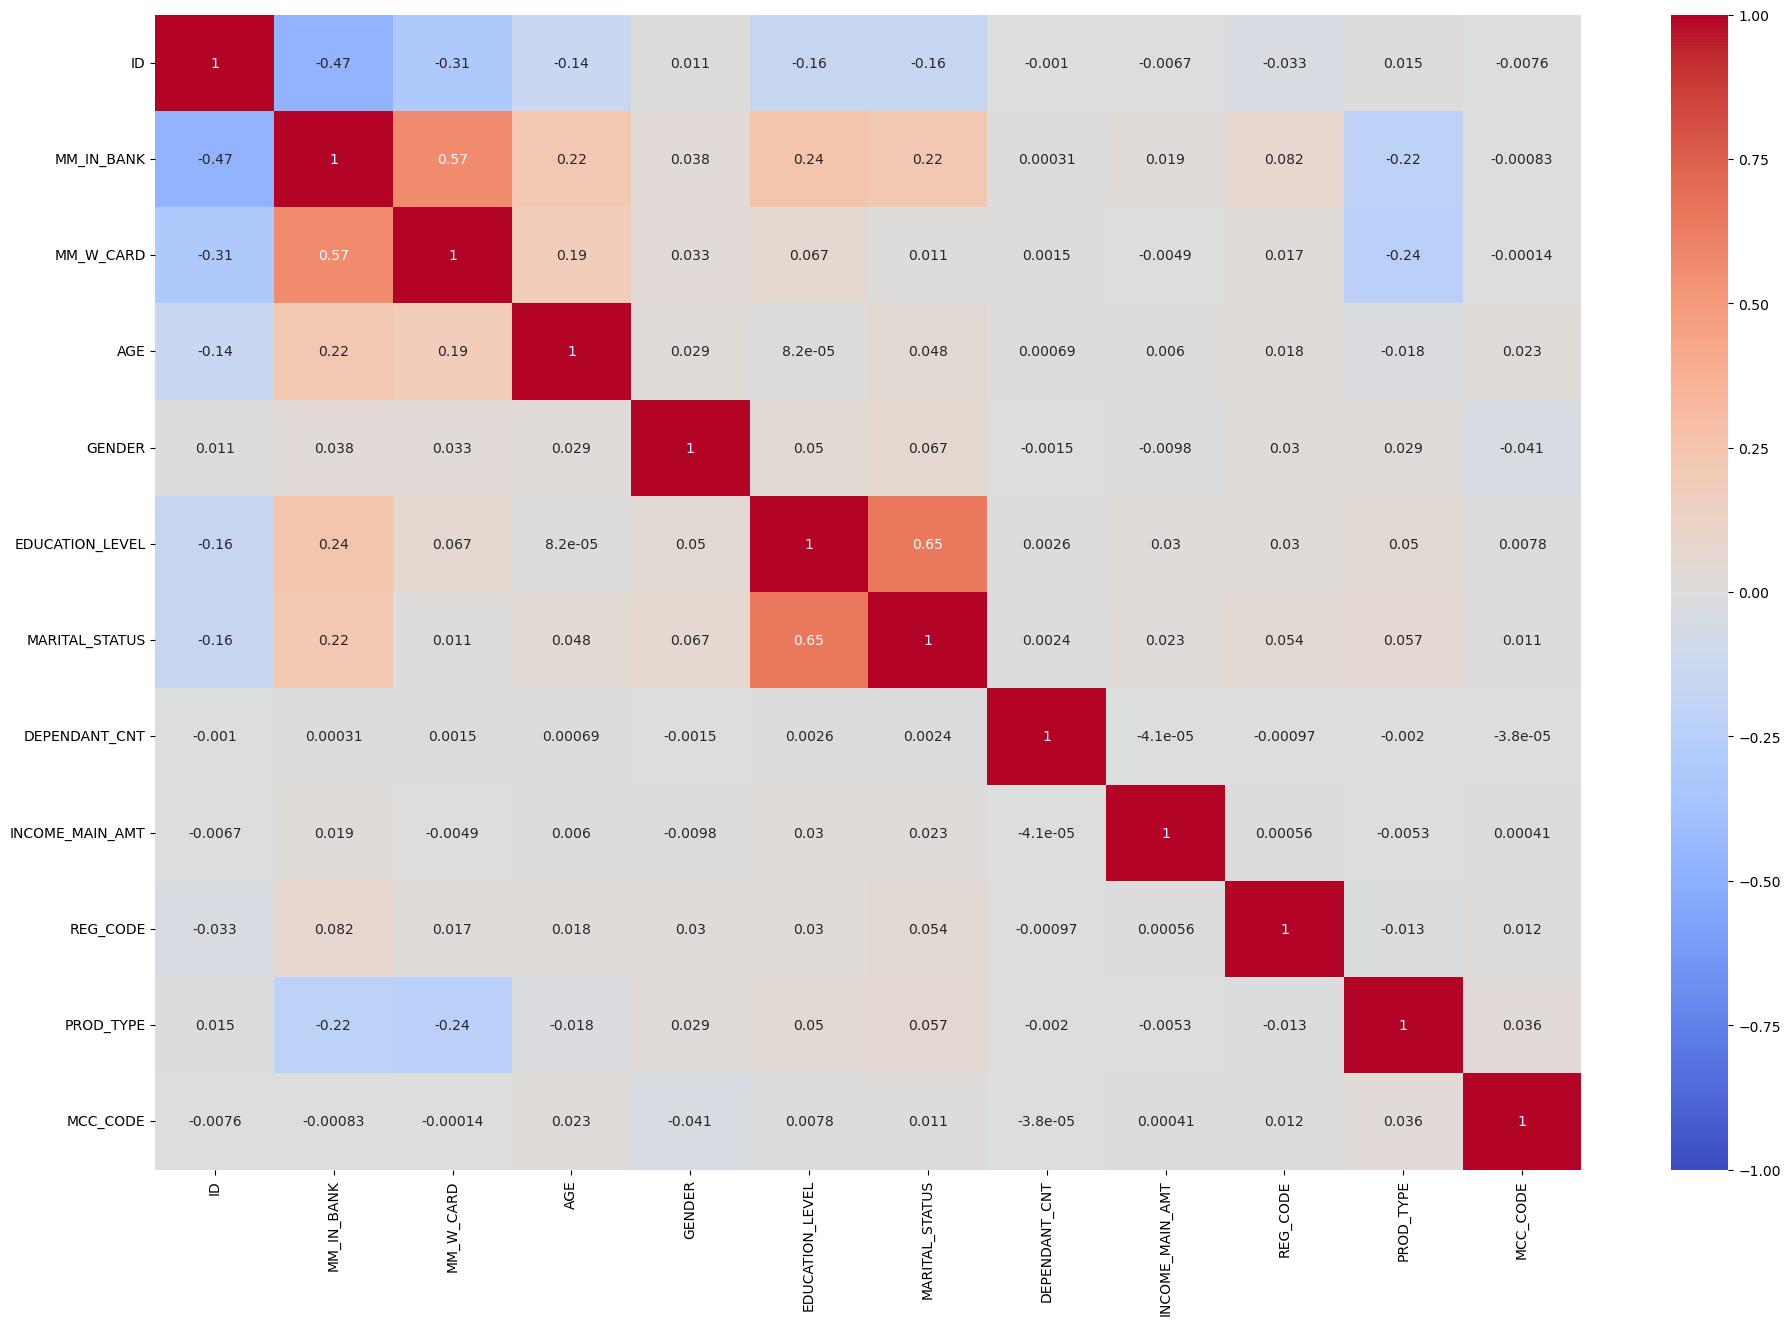

In [32]:
plt.figure(figsize=(23, 15))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

На корреляционной карте выше видно, что довольно сильно коррелируют между собой атрибуты:<br>
MATIRIAL_STATUS и EDUCATION_LEVEL<br>
EDUCATION_LEVEL и DEPENDANT_CNT<br>
MM_W_CARD и MM_IN_BANK<br>
ID и MM_IN_BANK<br>

In [33]:
df = df[['AGE', 'GENDER', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'INCOME_MAIN_AMT', 'REG_CODE', 'LOCATION_NAME']]
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,LOCATION_NAME
0,35,2,3,3,87000.0,9.0,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,35,2,3,3,87000.0,9.0,KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,35,2,3,3,87000.0,9.0,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,35,2,3,3,87000.0,9.0,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,35,2,3,3,87000.0,9.0,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...
...,...,...,...,...,...,...,...
12845070,45,1,6,3,150000.0,31.0,NaN
12845071,45,1,6,3,150000.0,31.0,NaN
12845072,45,1,6,3,150000.0,31.0,NaN
12845073,45,1,6,3,150000.0,31.0,NaN


### 1.3 Предварительная обработка данных  

In [34]:
df.isnull().sum()

AGE                       0
GENDER                    0
EDUCATION_LEVEL           0
MARITAL_STATUS            0
INCOME_MAIN_AMT     6450603
REG_CODE              45655
LOCATION_NAME      10582071
dtype: int64

Обрабатываем пропущенные выбросы, удаляя строки с NaN

In [35]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [36]:
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,LOCATION_NAME
0,35,2,3,3,87000.0,9.0,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...
1,35,2,3,3,87000.0,9.0,KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...
2,35,2,3,3,87000.0,9.0,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...
3,35,2,3,3,87000.0,9.0,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...
4,35,2,3,3,87000.0,9.0,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...
...,...,...,...,...,...,...,...
1177134,45,1,6,3,150000.0,31.0,SPAR 346\1 NOVOYASENEVSKIJ PR-T\GOROD MOSKVA\1...
1177135,45,1,6,3,150000.0,31.0,"YANDEX.PLUS\UL.TIMURA FRUNZE, D. 11, KORP. 44,..."
1177136,45,1,6,3,150000.0,31.0,BILIMBI\1 ANDROPOVA PR-T\MOSCOW\115432 RUSRUS
1177137,45,1,6,3,150000.0,31.0,"SUKHOFRUKTY\CENTRALNAYA, D. 22 CENTRALNAYA, D...."


Для всех числовых атрибутов строим коробчатые диаграммы для поиска выбросов

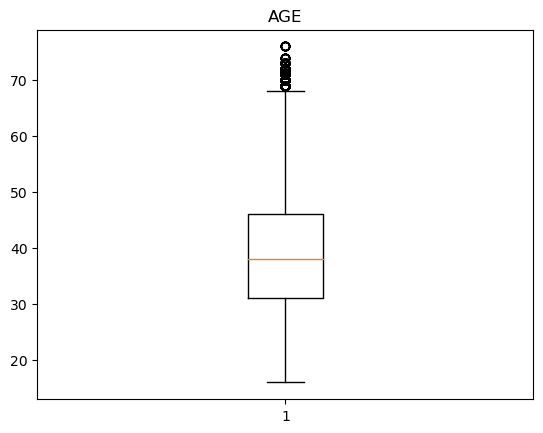

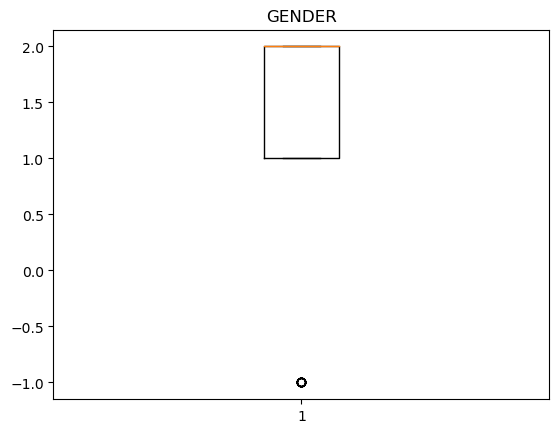

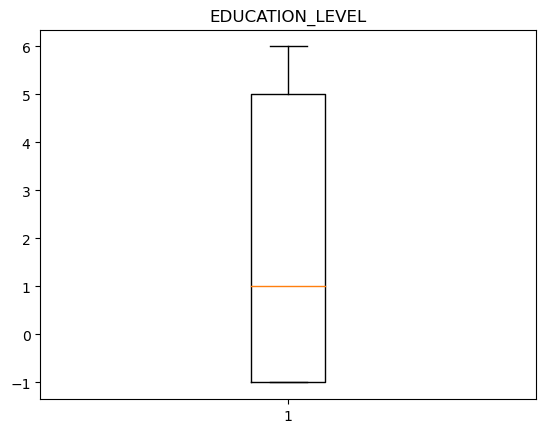

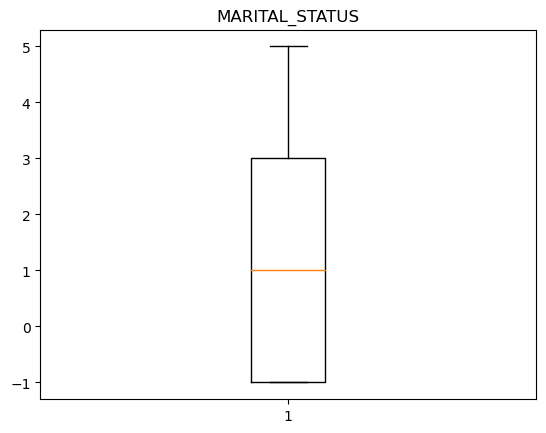

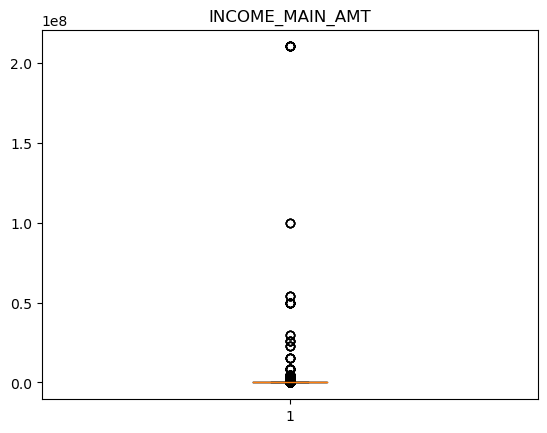

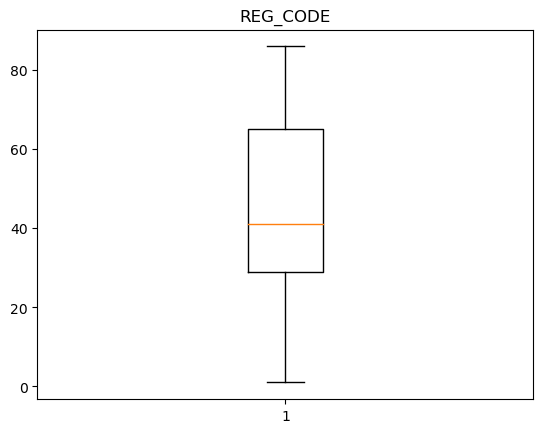

In [37]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


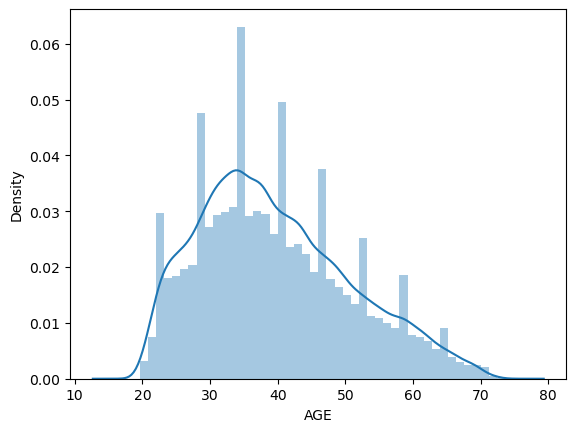

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


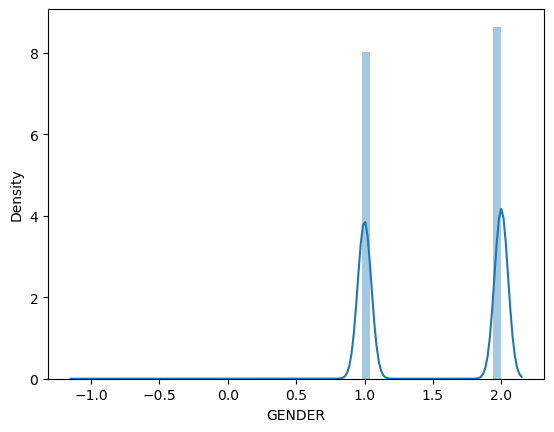

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


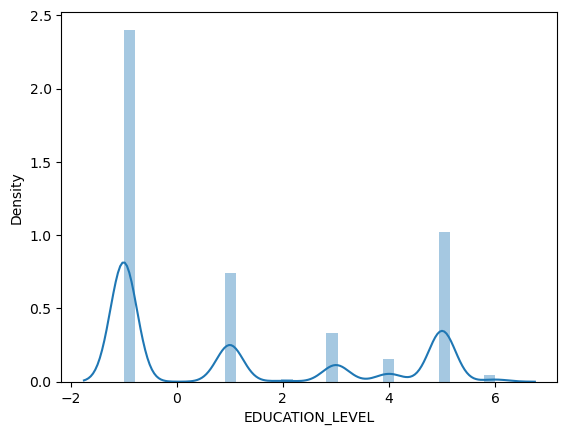

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


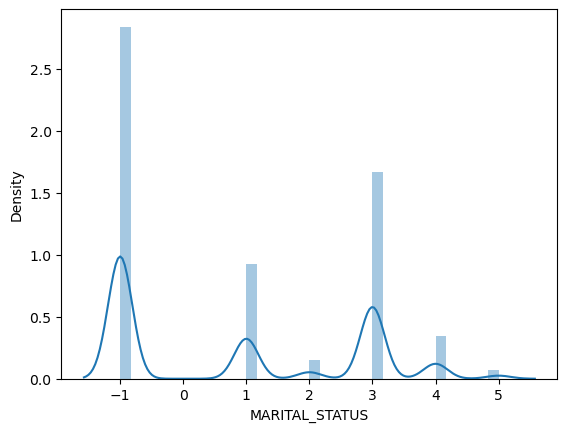

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


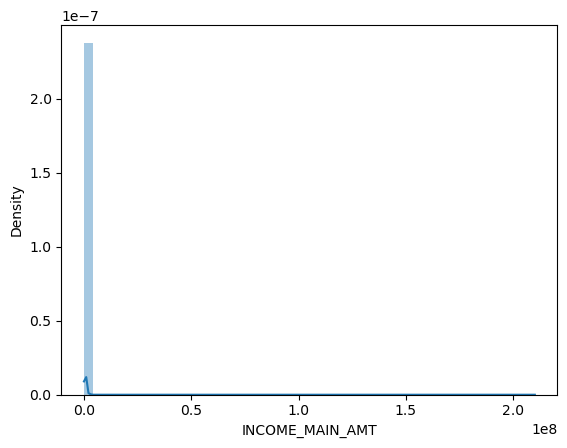

C:\Users\spa-a\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


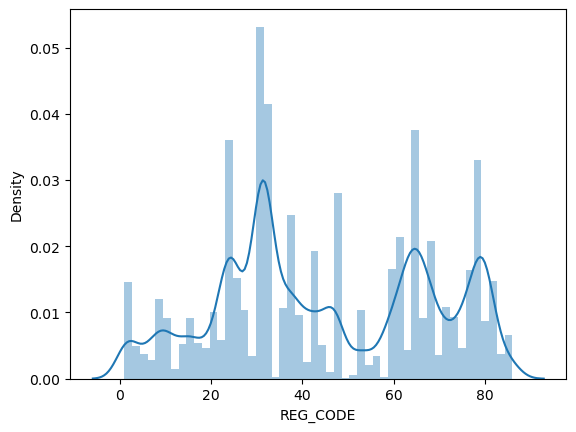

In [12]:
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    sns.distplot(df[col].dropna())
    plt.show()

In [ ]:
Если распределение нормальное, то мы применяем метод 3 сигма. Но среди наших атрибутов таких нет.
Мы используем правило межквартильного расстояния

In [38]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]

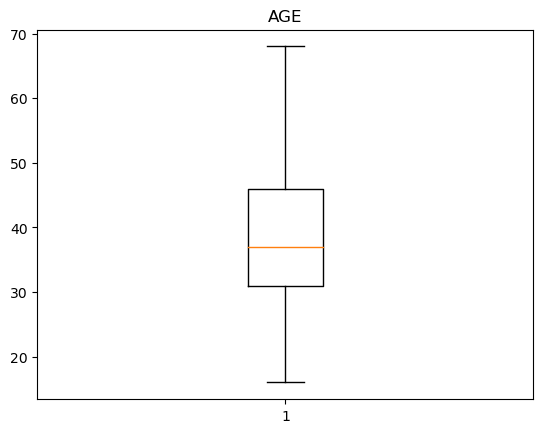

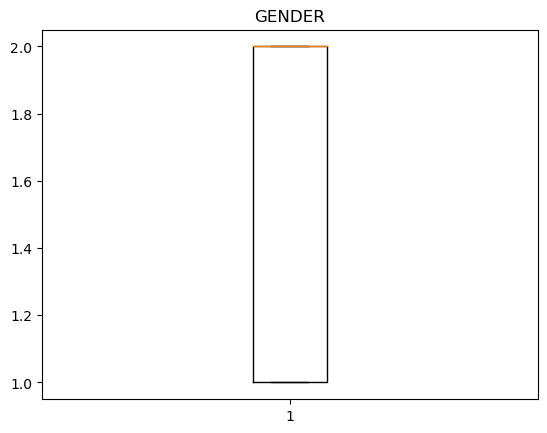

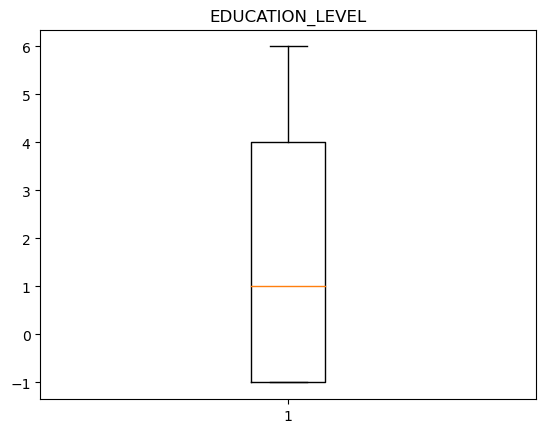

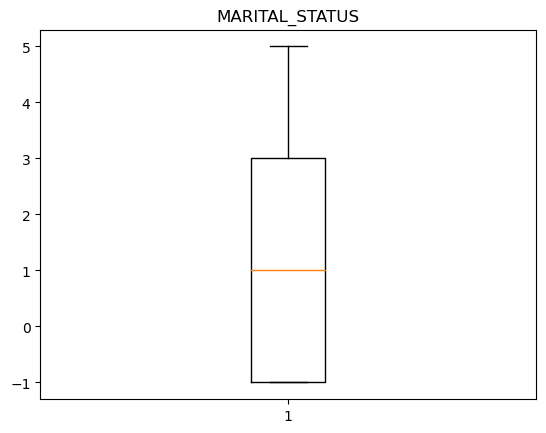

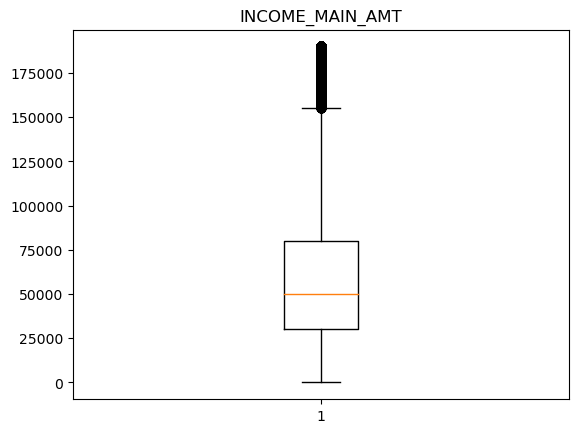

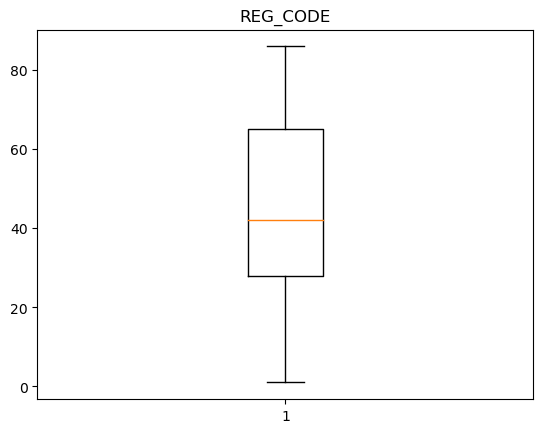

In [39]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    plt.boxplot(df[col])
    plt.show()

У атрибута 'INCOME_MAIN_AMT' можно увидеть небольшое отклонение от того что было, но это уже приемлимо

### 1.4 Формирование дополнительных атрибутов

Создаем дополнительный атрибут "INCOME_MAIN_AMT_CNY", который переводит из рублей в китайские юани. Это может быть полезно для китайский производителей

In [40]:
df['INCOME_MAIN_AMT_CNY'] = df['INCOME_MAIN_AMT'].apply(lambda x: x * 0.088)

In [41]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,LOCATION_NAME,INCOME_MAIN_AMT_CNY
0,35,2,3,3,87000.0,9.0,BRECEL\9A 8-J VOZDUSHNOJ ARMII STR\VOLGOGRAD\4...,7656.0
1,35,2,3,3,87000.0,9.0,KRASNOE BELOE\14 8-J VOZDUSHNOJ ARMII STR\VOLG...,7656.0
2,35,2,3,3,87000.0,9.0,YM UBER\82 BLD 12 SADOVNICHESKAYA STR\MOSCOW\1...,7656.0
3,35,2,3,3,87000.0,9.0,WB\6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER\POD...,7656.0
4,35,2,3,3,87000.0,9.0,YM*WILDBERRIES\MONEY.YANDEX.RU\MOSKVA\119021 ...,7656.0


In [42]:
df2 = df['LOCATION_NAME'].str.split('\\', 4 , expand= True )
df2.columns = ['shop', 'street', 'city', 'index']
df2

,shop,street,city,index
0,BRECEL,9A 8-J VOZDUSHNOJ ARMII STR,VOLGOGRAD,400137 RUSRUS
1,KRASNOE BELOE,14 8-J VOZDUSHNOJ ARMII STR,VOLGOGRAD,400137 RUSRUS
2,YM UBER,82 BLD 12 SADOVNICHESKAYA STR,MOSCOW,115035 RUSRUS
3,WB,6 BLD 1 INDUSTRIALNYJ PARK KOLEDINO TER,PODOLSK,142181 RUSRUS
4,YM*WILDBERRIES,MONEY.YANDEX.RU,MOSKVA,119021 RUSRUS
...,...,...,...,...
1177134,SPAR 346,1 NOVOYASENEVSKIJ PR-T,GOROD MOSKVA,117574 RUSRUS
1177135,YANDEX.PLUS,"UL.TIMURA FRUNZE, D. 11, KORP. 44, OFIS BTS S",MOSKVA,119021 RUSRUS
1177136,BILIMBI,1 ANDROPOVA PR-T,MOSCOW,115432 RUSRUS
1177137,SUKHOFRUKTY,"CENTRALNAYA, D. 22 CENTRALNAYA, D. 22",PROLETARSKIJ,142271 RUSRUS


In [43]:
df = pd.concat([df, df2], axis=1)
df = df.drop(['shop', 'street', 'LOCATION_NAME'], axis=1)
df

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_CNY,city,index
0,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS
1,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS
2,35,2,3,3,87000.0,9.0,7656.0,MOSCOW,115035 RUSRUS
3,35,2,3,3,87000.0,9.0,7656.0,PODOLSK,142181 RUSRUS
4,35,2,3,3,87000.0,9.0,7656.0,MOSKVA,119021 RUSRUS
...,...,...,...,...,...,...,...,...,...
1177134,45,1,6,3,150000.0,31.0,13200.0,GOROD MOSKVA,117574 RUSRUS
1177135,45,1,6,3,150000.0,31.0,13200.0,MOSKVA,119021 RUSRUS
1177136,45,1,6,3,150000.0,31.0,13200.0,MOSCOW,115432 RUSRUS
1177137,45,1,6,3,150000.0,31.0,13200.0,PROLETARSKIJ,142271 RUSRUS


### 1.5 Кластеризация

Подготовка данных
Отдельно возьму атрибуты, которые буду визуализировать для сегментации пользователей

In [46]:
#Помещу их в переменную X
X = df[["AGE", "GENDER", "EDUCATION_LEVEL"]]

Я выбрал эти атрибуты, так как в зависимости от региона и категории товара (продовца) стоимость покупок будет разной и я считаю, что этих атрибутов будет достаточно что бы модель не имела проблем с переобучением и недообучением

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.


Приводим данные в одному диапазону, чтобы качество кластеризации было получше

In [47]:
#обьявляю MinMaxScaler (Экземпляр класса)
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [48]:
X

array([[0.36538462, 1.        , 0.57142857],
       [0.36538462, 1.        , 0.57142857],
       [0.36538462, 1.        , 0.57142857],
       ...,
       [0.55769231, 0.        , 1.        ],
       [0.55769231, 0.        , 1.        ],
       [0.55769231, 0.        , 1.        ]])

#### PCA
Метод главных компонент — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

Понижение размерности. Уменьшает размерность без потери данных

In [49]:
#Обьявляю метод главных компонент
pca = PCA(n_components=2)
#Применяю его на данных
X = pca.fit_transform(X)

In [50]:
X

array([[-0.49865095,  0.20638646],
       [-0.49865095,  0.20638646],
       [-0.49865095,  0.20638646],
       ...,
       [ 0.45815673,  0.73452568],
       [ 0.45815673,  0.73452568],
       [ 0.45815673,  0.73452568]])

#### Функция визуализации
Отдельно вынесу функцию для визуализации

In [51]:
#Функция для визуализации распределения 
def viz(prediction):
    #Размер фигуры
    plt.figure(figsize=(5, 5))
    #plt.subplot(224)
    #Выводить изображение буду при помощи scatter
    plt.scatter(X[:, 0], X[:, 1], c=prediction)
    plt.title("Unevenly Sized Blobs")
    #Вывод изображения
    plt.show()

#### Выбор алгоритмов (KMeans, MiniBatchKMeans, GaussianMixtures)
Я решил взять алгоритмы KMeans, MiniBatchKMeans и GaussianMixtures, так как они идеально подходят для такого набора данных, они сочетают в себе скорость работы, а так же качество кластеризации

#### KMeans

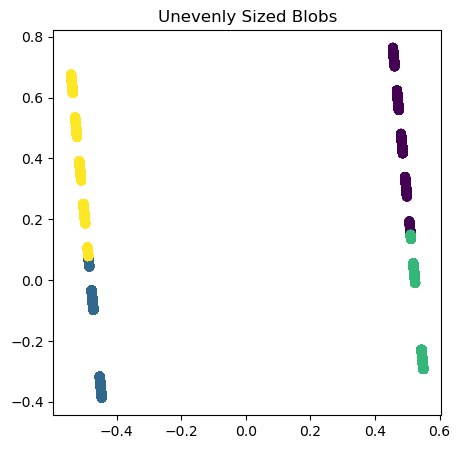

In [52]:
#Настройка параметров
#Создали экземпляр класса, определили 4 кластера, обучили на наших данных
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#Предсказание
kmpreds = kmeans.predict(X)
#Заношу кластеризированные метки в набор данных
df["KMCLUSTS"] = kmpreds

#Применяю функцию описаную выше
viz(df["KMCLUSTS"])

#### MiniBatchKMeans

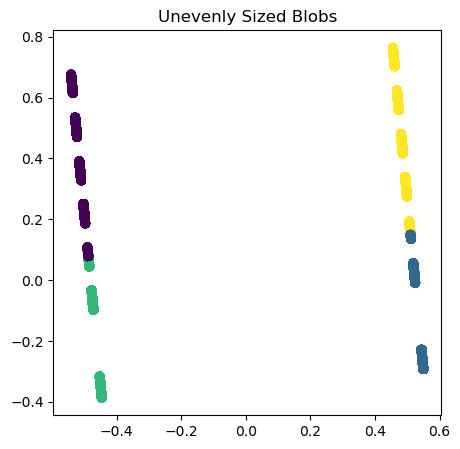

In [53]:
#Настройка параметров
kbmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=4096)
#Заношу кластеризированные метки в набор данных
#Обучили и сделали предсказание
df["KBCLUSTS"] = kbmeans.fit_predict(X)

viz(df["KBCLUSTS"])

#### GaussianMixture

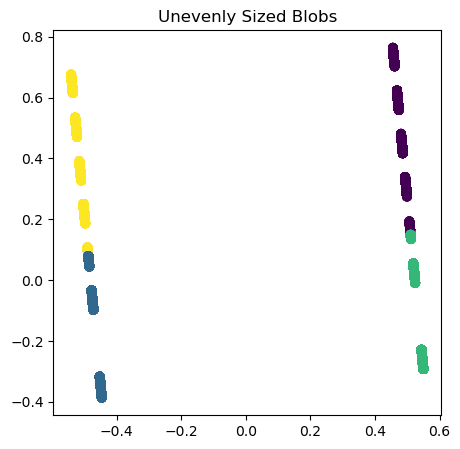

In [54]:
#Настройка параметров
gm = GaussianMixture(n_components=4, random_state=0).fit_predict(X)
#Заношу кластеризированные метки в набор данных
df["GMCLUSTS"] = gm

viz(df["GMCLUSTS"])

#### Результаты метрик

Calinski-Harabasz index
Представляет собой отношение суммы дисперсии между кластерами и межкластерной дисперсии для всех кластеров. Чем выше значение, тем лучше произведена кластеризация.

Davies-Bouldin index 
Показывает среднее «сходство» кластеров: расстояние между ними сравнивается с их размером. Чем меньше значение, тем лучше произведено разделение на кластеры.

In [55]:
from sklearn.metrics import silhouette_score

##### Kmeans 

In [57]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KMCLUSTS"]))
#Силуэт
#print(silhouette_score(X, df["KMCLUSTS"]))

8562777.88517429
0.29434043510105745


##### MiniBatchKmeans


In [58]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KBCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KBCLUSTS"]))

8562767.671140317
0.2943908050985117


##### GussianMixture

In [59]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["GMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["GMCLUSTS"]))

8558417.215902545
0.2935375466120095


#### Решение
По результатам метрик и визуализаций, лучшим алгоритмом является GussianMixture

В наш датафрейм были добавлены кластеры и тк GussianMixture отработал лучше, MiniBatchKmeans и Kmeans удаляем

In [60]:
# Удаление ненужных атрибутов с кластерами
df.drop(columns=['KMCLUSTS', 'KBCLUSTS'], axis=1, inplace=True)

### 1.6 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [ ]:
# df.to_csv('output.csv', index=False, encoding='utf-8-sig') 

--------------

# Модуль 2

-------------

In [63]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Алгоритмы классификации
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Игнорирование ошибок будущих версий
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# df = pd.read_csv('output.csv')

### 2.1 Разведочный анализ

In [61]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_CNY,city,index,GMCLUSTS
0,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS,3
1,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS,3
2,35,2,3,3,87000.0,9.0,7656.0,MOSCOW,115035 RUSRUS,3
3,35,2,3,3,87000.0,9.0,7656.0,PODOLSK,142181 RUSRUS,3
4,35,2,3,3,87000.0,9.0,7656.0,MOSKVA,119021 RUSRUS,3


Распределение не является нормальным, скошено вправо, это говорит о том, что в основном покупают на ... сумму, но есть не так много пользователей, которые покупают дорогие товары

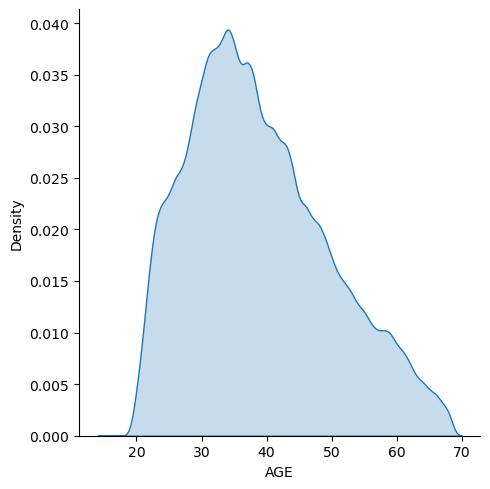

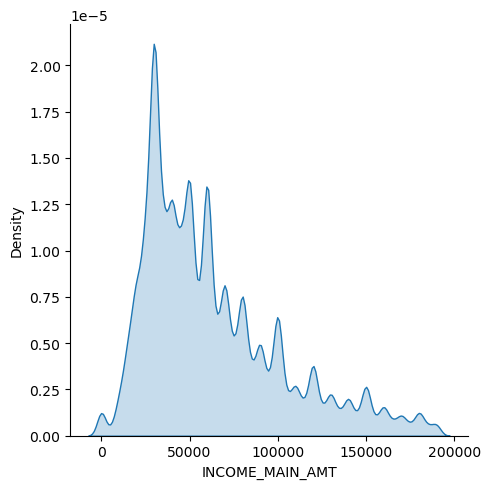

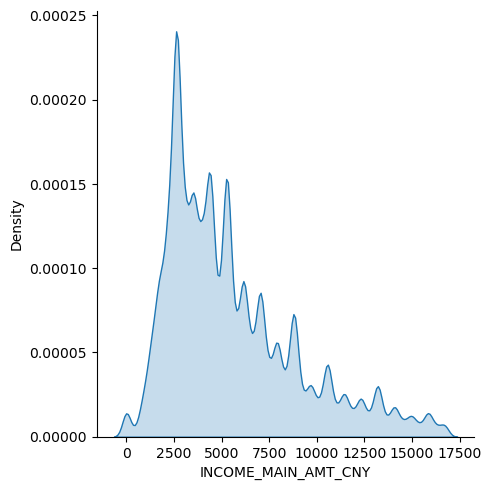

In [65]:
#displot - плотность распределения
#Лист с признаками которые не будут учитываться при визуализации (Не категориальные)
skip = ['AGE', 'INCOME_MAIN_AMT', 'INCOME_MAIN_AMT_CNY']
#Не категориальные признаки
for i in skip:
    if type(df[i].iloc[2]) == np.int64 or type(df[i].iloc[2]) == np.float64:
        sns.displot(df, x=i, kind="kde", fill=True)

In [70]:
df['city'].nunique()

20191

In [71]:
df['index'].nunique()

29683

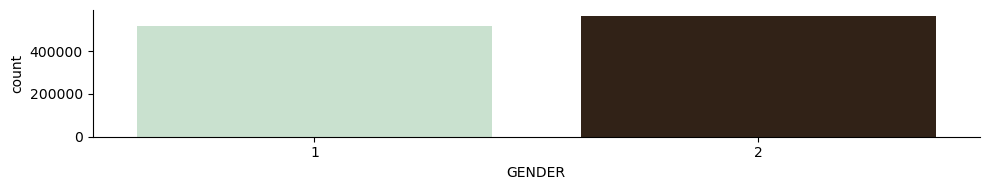

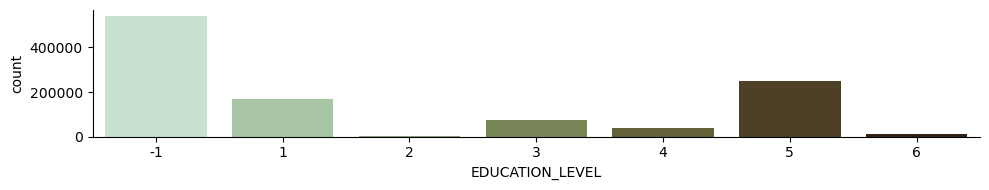

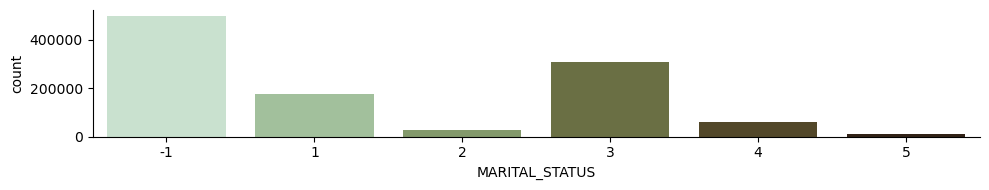

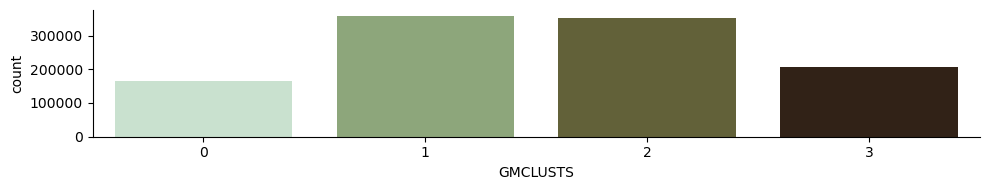

In [67]:
#Категориальные признаки
for i in df.columns:
    if i not in skip and i != 'REG_CODE' and i != 'city' and i != 'index':
        sns.catplot(x=i, kind='count', palette='ch:25', height=2, aspect=5, data=df)
        plt.show()

Видим, что выборка несбалансированная, больше всего в ... статусом, очень много с ...

REG_CODE плохо визуализировался, так что его можно вывести отдельно

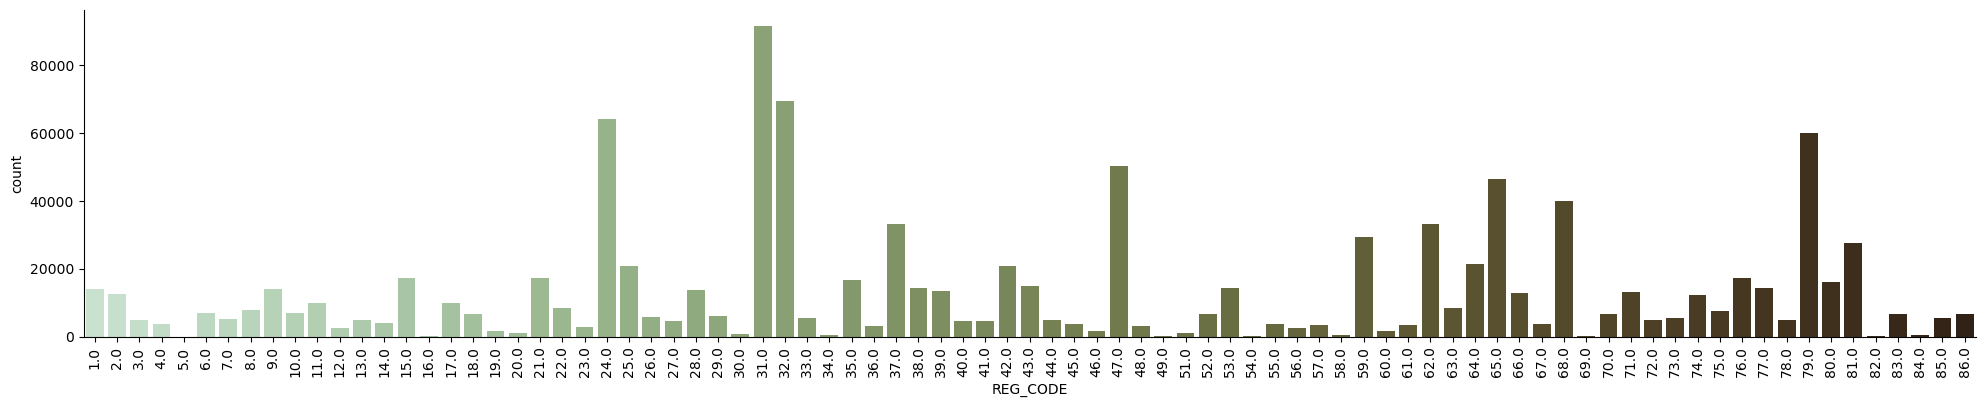

In [68]:
sns.catplot(x='REG_CODE', kind='count', palette='ch:25', height=4, aspect=5, data=df)
plt.xticks(rotation=90)
plt.show()

### 2.2 Разбиение выборки

In [69]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_CNY,city,index,GMCLUSTS
0,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS,3
1,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS,3
2,35,2,3,3,87000.0,9.0,7656.0,MOSCOW,115035 RUSRUS,3
3,35,2,3,3,87000.0,9.0,7656.0,PODOLSK,142181 RUSRUS,3
4,35,2,3,3,87000.0,9.0,7656.0,MOSKVA,119021 RUSRUS,3


Система рекомендаций будет определять категорию принадлежности, то есть порекомендовать пользователю товар для мужчин или для женщин

#### MinMaxScaler
Преобразование характеристик путем масштабирования каждой характеристики в заданном диапазоне. Этот оценщик масштабирует и переводит каждый признак в отдельности таким образом,чтобы он находился в заданном диапазоне на обучающем множестве,например,между нулем и единицей.

In [88]:
#обьявляю MinMaxScaler
#Приводит к одному диапазону
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [89]:
#Помещу их в переменную X (атрибуты, признаки)
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS"]]
#Прогнозируем гендер (то, что мы прдсказываем)
y = df["GENDER"]

In [91]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Делим 30 на 70, тк данных достаточно и у нас нет риска, что в тестовую выборку уйдут аномальные значения. При чем используем стратификацию, которая позволяет в равном долевом соотношении распределить классы

#### Реализация моделей

In [ ]:
Буду использовать ..., тк они ...

#### KNN

In [92]:
#Объявление классификатор
neigh = KNeighborsClassifier()
#Обучение классификатора
neigh.fit(X_train, y_train)

KNeighborsClassifier()

#### GaussianNB

In [93]:
#Объявление классификатор
gnb = GaussianNB()
#Обучение классификатора
gnb.fit(X_train, y_train)
GaussianNB()

GaussianNB()

#### LogisticRegression

In [94]:
#Объявление классификатор
clf = LogisticRegression()
#Обучение классификатора
clf.fit(X_train, y_train)

LogisticRegression()

Классификатор "Дерево решений" - Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)

DecisionTreeClassifier()

#### Метрики
Теперь посмотрю на результаты метрик, я буду рассматривать метрики - f1 и accuracy sore, f так же f1 по macro avg

Точность ( precision ) - на сколько модель определяет интересующий нас класс
Полнота (recall) - насколько полно находит (всех ли нашла женщин)
f1 - если повышается точность, то полнота уменьшается и наоборот (Оптимальное соотношение точности и полноты)

Буду ориентироваться на f1, тк 

In [95]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    155172
           2       1.00      1.00      1.00    169239

    accuracy                           1.00    324411
   macro avg       1.00      1.00      1.00    324411
weighted avg       1.00      1.00      1.00    324411



#### GaussianNB

In [96]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           1       0.32      0.31      0.32    155172
           2       0.38      0.39      0.38    169239

    accuracy                           0.35    324411
   macro avg       0.35      0.35      0.35    324411
weighted avg       0.35      0.35      0.35    324411



#### LogisticRegression

In [97]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.32      0.32      0.32    155172
           2       0.37      0.37      0.37    169239

    accuracy                           0.34    324411
   macro avg       0.34      0.34      0.34    324411
weighted avg       0.34      0.34      0.34    324411



In [100]:
#Вывожу результаты метрик при помощи Tree
print(classification_report(y_test, Tree.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    155172
           2       1.00      1.00      1.00    169239

    accuracy                           1.00    324411
   macro avg       1.00      1.00      1.00    324411
weighted avg       1.00      1.00      1.00    324411



In [103]:
pd.DataFrame(index=X.columns,data=Tree.feature_importances_,columns=['Feature Importance'])

,Feature Importance
AGE,0.0
EDUCATION_LEVEL,0.0
REG_CODE,0.0
GMCLUSTS,1.0


#### Решение
По итогам метрик, остановлюсь на алгоритме KNN, так как он имеет самые высокие показатели, по f1 accuracy показал 0.99, и f1 macro avg 0.99. В то время как остальные алгоритмы показали 1, что может оказаться переобучением.

### 2.3 Оптимизация модели

#### Генерация новых данных

In [107]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))

In [113]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

              precision    recall  f1-score   support

           1       1.00      0.68      0.81    155172
           2       0.77      1.00      0.87    169239

    accuracy                           0.85    324411
   macro avg       0.89      0.84      0.84    324411
weighted avg       0.88      0.85      0.84    324411



In [114]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    155172
           2       1.00      1.00      1.00    169239

    accuracy                           1.00    324411
   macro avg       1.00      1.00      1.00    324411
weighted avg       1.00      1.00      1.00    324411



... (гиперпараметры) лучшее качество показало на 

In [115]:
df.head()

,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,INCOME_MAIN_AMT_CNY,city,index,GMCLUSTS
0,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS,3
1,35,2,3,3,87000.0,9.0,7656.0,VOLGOGRAD,400137 RUSRUS,3
2,35,2,3,3,87000.0,9.0,7656.0,MOSCOW,115035 RUSRUS,3
3,35,2,3,3,87000.0,9.0,7656.0,PODOLSK,142181 RUSRUS,3
4,35,2,3,3,87000.0,9.0,7656.0,MOSKVA,119021 RUSRUS,3


В данном случае можно воспользоваться уже созданным нами атрибутом INCOME_MAIN_AMT_USD

In [ ]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [ ]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS", 'INCOME_MAIN_AMT_USD']]
y = df["GENDER"]

In [ ]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Реализация моделей

In [ ]:
Подбираем параметры

In [116]:
#Объявление классификатор
# Создаем экземпляр клааса
neigh2 = KNeighborsClassifier(n_neighbors=2, leaf_size=10, p=3, n_jobs=-1)
#Обучение классификатора
# Обучам модель
neigh2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=3)

#### Метрика

In [117]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh2.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    155172
           2       1.00      1.00      1.00    169239

    accuracy                           1.00    324411
   macro avg       1.00      1.00      1.00    324411
weighted avg       1.00      1.00      1.00    324411



Модель стала хуже, так что для дальнейшего использования лучше будет оставить первую версию

#### Сохранение лучшей модели

Ниже представлен код сохранения модели

In [118]:
#Сохраняем модель
import pickle
filename = 'finalized_model.sav'
pickle.dump(neigh, open(filename, 'wb'))

Так выглядит загрузка модели

In [119]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

### 2.4 Подготовка отчета

Тут отчет по пунктам сами напишите...<br>
Нужно указать что было под пунктами:
* 1 - 
* 2 - 
* 3 - 
* 4 -
* И тд...

In [120]:
 df.to_csv('output2.csv', index=False, encoding='utf-8-sig')